In [1]:
%pylab inline
import sklearn.preprocessing as pre
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function
from ipywidgets import interact, interactive
import ipywidgets as widgets

Populating the interactive namespace from numpy and matplotlib


In [2]:
!head ex1data1.txt

6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166


# Load Data

In [3]:
data = np.loadtxt('ex1data1.txt',delimiter=',');
xs = data[:,0]
ys = data[:,1]

# Plotting

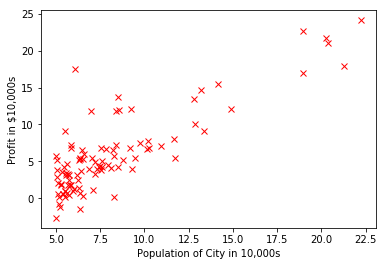

In [4]:
plt.plot(xs,ys,'rx');
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

# Cost Function

In [5]:
def costFunction(theta,X,y):
    m, n = X.shape
    J = (1 / 2) * np.mean((X.dot(theta) - y)**2)
    return J

In [6]:
poly = pre.PolynomialFeatures(1)
X = poly.fit_transform(xs.reshape(-1,1))
y = ys.reshape(-1,1)
initial_theta = np.zeros((2,1))
initial_cost = costFunction(initial_theta,X,y)
print('The initial cost is %f'%initial_cost)

The initial cost is 32.072734


# Gradient Descent

In [7]:
def gradientDescent(theta,X,y,alpha,iterations):
    m,n = X.shape
    for i in range(iterations):
        theta = theta - (alpha / m) * X.T.dot(X.dot(theta) - y)
    return theta

In [45]:
def plotGD(alpha,iterations):
    alpha = float(alpha)
    theta = gradientDescent(initial_theta,X,y,alpha,iterations) 
    plt.plot(xs,ys,'rx',label='training data')
    plt.plot(xs,X.dot(theta),'-',label='linear regression')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.legend(loc=4)
    plt.show()
    return theta

In [64]:
w = interactive(plotGD,
                alpha=widgets.FloatText(value=0.01,
                                        step=0.001),
                iterations=widgets.IntSlider(value=1500,
                                             min=1,
                                             max=2000,
                                             step=10));
display(w)

interactive(children=(FloatText(value=0.01, description='alpha', step=0.001), IntSlider(value=1500, descriptio…

In [60]:
features = np.array([[1,3.5],[1,7]])
theta = w.result
predictions = features.dot(theta)
for p in np.hstack((features,predictions)) * 10000:
    print('The prediction for profit in area of {1:,.0f} people is ${2:.2f}'.format(*p))

The prediction for profit in area of 35,000 people is $3496.76
The prediction for profit in area of 70,000 people is $44874.21


# Visualizing J

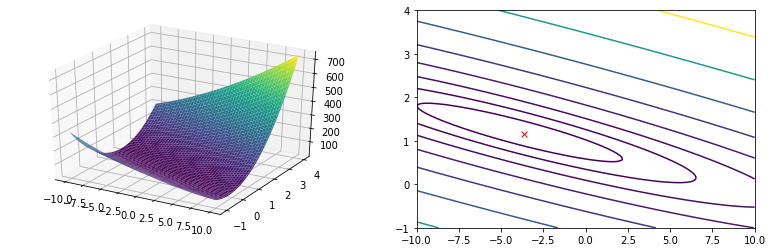

In [10]:
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta1_vals), len(theta0_vals)))

for i in range(len(theta1_vals)):
    for j in range(len(theta0_vals)):
        J_vals[i,j] = costFunction([[theta0_vals[j]], [theta1_vals[i]]],X,y)


U,V = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure(figsize=plt.figaspect(0.3))
# left axe
ax1 = fig.add_subplot(1,2,1,projection='3d')
ax1.plot_surface(U,V,J_vals,cmap='viridis');
#right axe
ax2 = fig.add_subplot(1,2,2)
ax2.contour(theta0_vals,theta1_vals,J_vals, np.logspace(-2,3,20));
ax2.plot(theta[0],theta[1],'rx');